# SD212: Graph mining
## Lab 6: Spectral embedding

In this lab, you will learn to embed the nodes of a graph in a vector space of low dimension. We consider the  embedding based on the top eigenvectors of the transition matrix $P=D^{-1}A$.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.embedding import Spectral
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph and bipartite graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the spectral embedding of the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [5]:
dataset = karate_club(metadata=True)

In [6]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

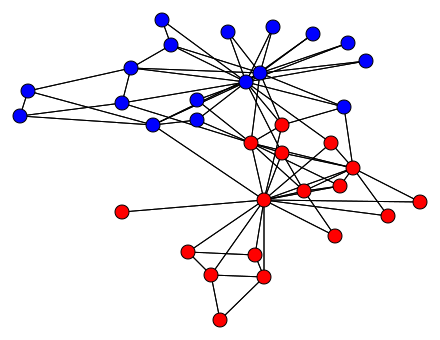

In [7]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Display the spectrum of the transition matrix (e.g., first 20 eigenvalues). 
* What does the spectrum suggest?
* Display the graph with some eigenvectors.
* Display the embedding of the graph in dimension 2.
* Compare the clusters obtained with the sign of the first dimension to the ground-truth clusters.

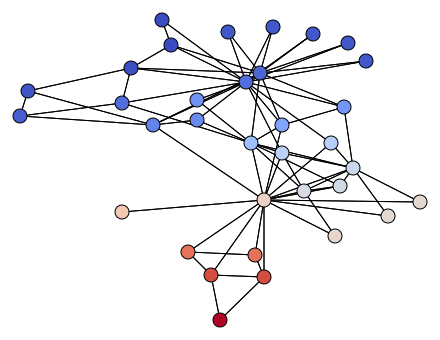

In [8]:
spectral = Spectral(20, normalized=False)
spectral.fit(adjacency)
# eigenvalues (adding the first)
eigenvalues = [1] + list(spectral.eigenvalues_)
# eigenvectors
eigenvectors = spectral.eigenvectors_
# display eigenvector
image = svg_graph(adjacency, position, scores=eigenvectors[:, 0])
SVG(image)

In [9]:
print(eigenvalues)

[1, 0.8677276707704835, 0.7129510146149642, 0.6126867673898686, 0.387769459799692, 0.35100705333080007, 0.2927917975058477, 0.2600420106991578, 0.22908938314886906, 0.17705714766180924, 0.13516705541938046, 0.09318399841352487, 4.440892098500626e-16, 3.3306690738754696e-16, 3.3306690738754696e-16, 2.220446049250313e-16, 2.220446049250313e-16, 2.220446049250313e-16, 0.0, -2.220446049250313e-16, -2.220446049250313e-16]


There is only one connected component (all eigenvaules are distinct).

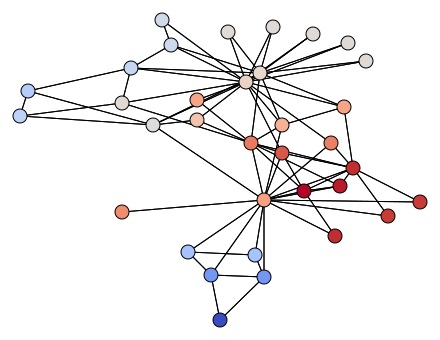

In [10]:
image = svg_graph(adjacency, position, scores=eigenvectors[:, 1])
SVG(image)

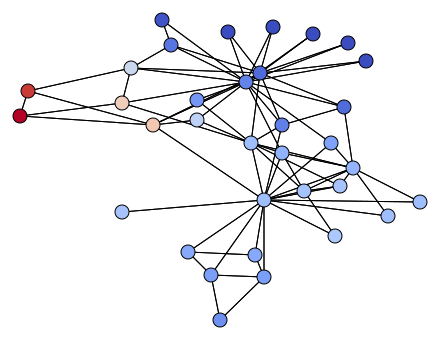

In [11]:
image = svg_graph(adjacency, position, scores=eigenvectors[:, 2])
SVG(image)

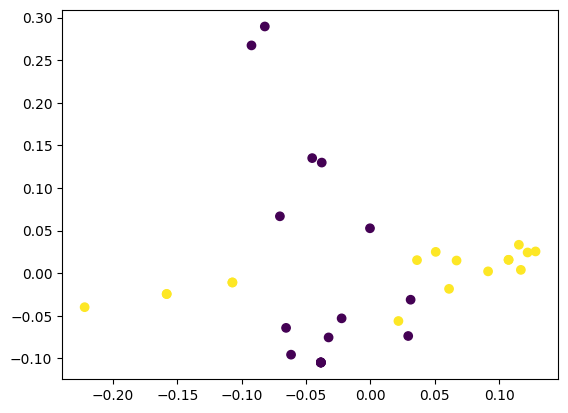

In [12]:
x, y = eigenvectors[:, 1], eigenvectors[:, 2]
plt.scatter(x,y, c=labels_true)

## Openflights


We now consider a larger graph. We use spectral embedding in dimension 20 to cluster the graph by k-means in the embedding space.

In [13]:
dataset = openflights

In [14]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

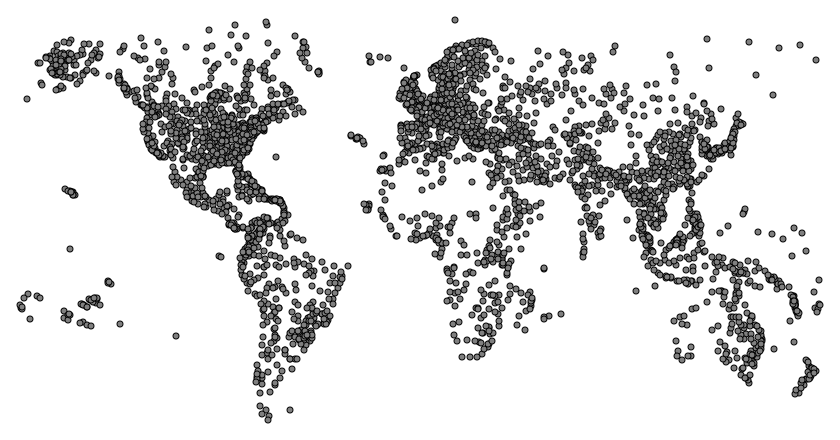

In [15]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with 8 clusters found by k-means in the embedding space.
* Do the same without normalization on the unit sphere (``normalized=False``).<br> Interpret the results. You might compute the distance of the barycenter of each cluster to the origin.

In [16]:
spectral = Spectral(20, normalized=True)

In [17]:
embedding = spectral.fit_transform(adjacency)

/Users/df/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


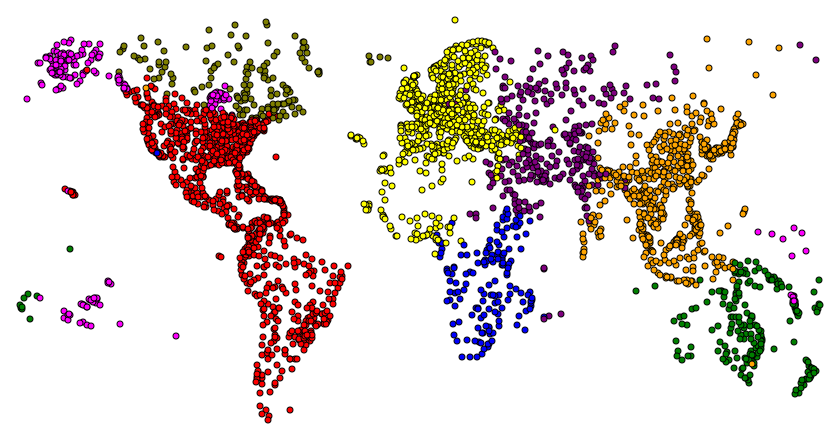

In [18]:
# perform kmeans on 8 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
labels_pred = kmeans.fit_predict(embedding)

image = svg_graph(adjacency, position, labels=labels_pred, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

/Users/df/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


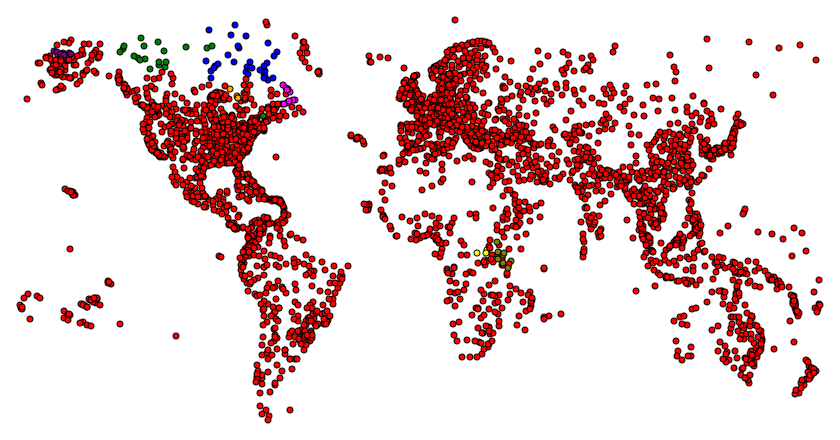

In [19]:
spectral = Spectral(20, normalized=False)
embedding = spectral.fit_transform(adjacency)
# perform kmeans on 8 clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
labels_pred = kmeans.fit_predict(embedding)

image = svg_graph(adjacency, position, labels=labels_pred, width=800, height=400, node_size=3, display_edges=False)
SVG(image)


Without normalization, we have a saturation of some nodes (strongly connected to the rest...)

## 2. Directed graphs and bipartite graphs

We now work on directed graph and bipartite graphs. We measure proximity between nodes in terms of [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Equivalently, we consider the embedding on the unit sphere (``normalized=True``).

## Wikipedia Vitals

In [20]:
dataset = wikivitals

In [21]:
adjacency = dataset.adjacency
biadjacency = dataset.biadjacency
names = dataset.names
words = dataset.names_col
labels = dataset.labels
names_labels = dataset.names_labels
labels_hierarchy = dataset.labels_hierarchy
names_labels_hierarchy = dataset.names_labels_hierarchy

## To do

We first consider the spectral embedding of the graph of links in dimension 20.

* List the 10 articles that are closest to **Vincent van Gogh** in terms of cosine similarity in the embedding space.
* Display the 3D-plot of each label in the embedding space (top 3 dimensions). <br>You might represent each label by a point located at the barycenter of the corresponding articles, with a size proportional to the number of articles. Use ``plotly`` for an interactive plot.
* Display the dendrogram of the top-100 articles on **Arts** (in terms of Personalized PageRank) given by the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method) in the embedding space (hierarchical clustering).

In [22]:
spectral = Spectral(20, normalized=True)
embedding = spectral.fit_transform(adjacency)


In [23]:
# find the index of Vincent van Gogh page
index = np.where(names == 'Vincent van Gogh')[0][0]

# find the 10 closest pages to Vincent van Gogh page in the embedding space with cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(embedding[index, :].reshape(1, -1), embedding)
closest_pages = np.argsort(cosine_similarities[0, :])[-10:][::-1]

# display the 10 closest pages
for i in closest_pages:
    print(names[i])
    


Vincent van Gogh
Georges Seurat
Paul Cézanne
Paul Gauguin
Henri de Toulouse-Lautrec
Franz Marc
Post-Impressionism
Edvard Munch
Henri Rousseau
Musée National d'Art Moderne


In [24]:
import plotly.express as px

In [25]:
# plot the embedding in 3D for each label for the 10 closest pages
fig = px.scatter_3d(embedding[closest_pages, :], x=0, y=1, z=2, color=labels[closest_pages], text=names[closest_pages])
fig.show()


In [26]:
from scipy.cluster.hierarchy import linkage

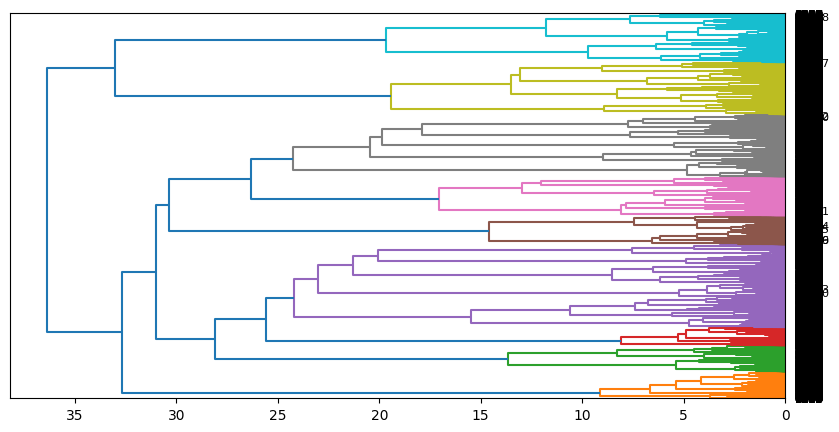

In [27]:
# Cluster the pages with the Ward method according to the embedding
link = linkage(embedding, method='ward')

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 5))
dendrogram(link, orientation='left', leaf_font_size=8)
plt.show()


## To do

* Repeat the same experiments on the bipartite graph between articles and words.
* List the 10 articles and the 10 words that are closest to the word **painting** in the embedding space.

In [28]:
spectral = Spectral(20, normalized=True)
embedding = spectral.fit_transform(biadjacency)

# find the index of Vincent van Gogh page
index = np.where(names == 'Painting')[0][0]

# find the 10 closest pages to Vincent van Gogh page in the embedding space with cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(embedding[index, :].reshape(1, -1), embedding)
closest_pages = np.argsort(cosine_similarities[0, :])[-10:][::-1]

# display the 10 closest pages
for i in closest_pages:
    print(names[i])

# plot the embedding in 3D for each label for the 10 closest pages
fig = px.scatter_3d(embedding[closest_pages, :], x=0, y=1, z=2, color=labels[closest_pages], text=names[closest_pages])
fig.show()


Painting
Sculpture
Collage
Decorative arts
Arnolfini Portrait
Engraving
Printmaking
Visual arts
Roman art
Mural


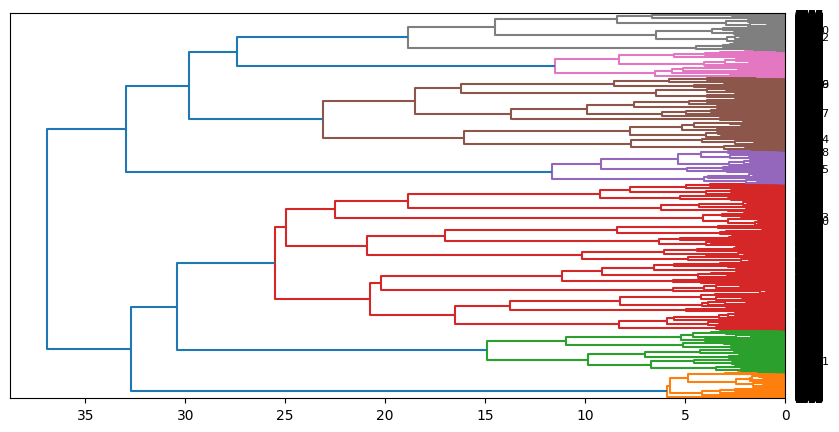

In [29]:
# Cluster the pages with the Ward method according to the embedding
link = linkage(embedding, method='ward')

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 5))
dendrogram(link, orientation='left', leaf_font_size=8)
plt.show()

## To do

* Prove that the average cosine similarity between nodes in some set $S$ is equal to the square distance of the barycenter of $S$ to the origin.

For the following questions, first consider the graph of links, then the bipartite graph between articles and words:

* Compute the average cosine similarity between articles of the **Mammals** category (see hierarchical labels).
* Compare with the expected cosine similarity between two articles sampled uniformly at random.
* Defining a category as **topical** if its average cosine similarity is close to 1, rank the 11 categories (Arts, History,...) by topicality. 
* List the 10 most topical and the 10 less topical hierarchical categories having at least 10 articles (like **Mammals**). 

Let $S$ be a set of $n$ nodes, that we denote $x_1$, ... , $x_n$.

The average cosine similarity, taking into account self-similarity is defined as :
$$ C(s) = \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=i}^{n} \frac{<x_i, x_j>}{||x_i|| ||x_j||} $$

In an other hand, the Barycenter is defined as : 
$$B^2 (s) =  \frac{1}{n^2} || \sum_{i=1}^{n} x_i ||^2

When developped using Al-Kashi : 
$$ B(s) = \frac{1}{n^2} \sum_{i=1}^{n} ||x_i^2|| +  \sum_{i \neq j} \frac{<x_i, x_j>}{||x_i|| ||x_j||}$$

Hence the desired equality.
